<a href="https://colab.research.google.com/github/ttjh1234/Study_MLDL/blob/main/chapter07_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 신경망 모델 훈련

인공 신경망 모델을 훈련하는 모범 사례와 필요한 도구들을 살펴보겠다.

데이터는 전 절에서 사용한 패션MNIST dataset을 가지고 학습하겠다.

## 손실 곡선

패션 MNIST 데이터 셋을 적재하고 train_set과 valid_set으로 나누겠다.

(keras.datasets을 load_data()를 써서 가져오면 자동으로 train_set과 test_set을 나눠준다.) 

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(x_train,y_train),(x_test,y_test)=keras.datasets.fashion_mnist.load_data()
x_train=x_train/255.0
x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train,test_size=0.2,random_state=42)
print(x_train.shape,x_test.shape,x_valid.shape)

4423680/4422102 [==============================] - 0s 0us/step
(48000, 28, 28) (10000, 28, 28) (12000, 28, 28)


신경망 모델을 만드는 과정을 함수로 정의하여 만들어보겠다.

전 절에서 배운 것처럼 Flatten함수를 사용하여 input_data를 

1차원 배열로 만들지 않고 바로 사용하겠다.

그 후 밀집층을 relu 함수를 적용해 만들고, 추가적으로 매개변수에 층을 전달하면, 

신경망에 층을 추가하는 식으로 만들었다.

제일 마지막은 출력층을 만들어주며, 타깃값이 총 10개이므로 softmax함수를 사용해준다.


In [2]:
def model_fn(a_layer=None):
  model=keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100,activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10,activation='softmax'))
  return model

In [3]:
model=model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


모델을 만들고, train_set을 통해 훈련을 시킨다. 

complie 함수를 정의해주는데, 손실함수에 sparse_categorical_crossentropy를 사용하여 

타깃값을 원핫인코딩을 하지않고, 바로 레이블 그대로 사용해준다.

정확도를 지표로 해서 모델을 적합해보겠다.

인공신경망에서 fit()함수의 매개변수 중 **verbose**는 훈련 과정 출력을 조정해준다.

기본값은 1로 에포크마다 진행 막대와 함께 손실 등의 지표가 출력된다.

2로 바꾸면 진행 막대를 빼고 출력되고, 0으로 지정하면 훈련 과정이 나타나지 않는다.

인공신경망에서 모델을 적합시키면, History 클래스 객체를 반환하는데,

History 객체에는 훈련 과정에서 계산한 지표(손실과 정확도 등)이 저장되어있다.

In [4]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(x_train,y_train,epochs=5,verbose=0)

History 객체에는 훈련 측정값이 담겨져있는 history 딕셔너리가 들어있다.

딕셔너리의 키값들을 살펴본다.

In [5]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


딕셔너리안에는 손실과 정확도가 포함되어있다.

케라스는 기본적으로 각 에포크마다 손실을 계산하며, 

complie()메소드에서 accuracy라는 지표를 추가했기 때문에 History 객체 안에 저장되어있다.

각 에포크마다 손실을 matplotlib를 사용하여 도식해보겠다.

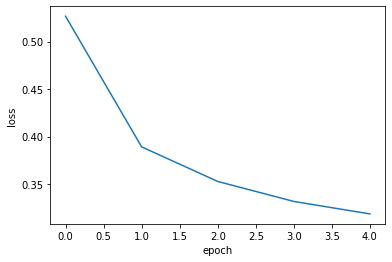

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

에포크마다 손실이 감소하는 것을 확인할 수 있다.

이번에는 accuracy 지표를 각 에포크마다 확인해보겠다.

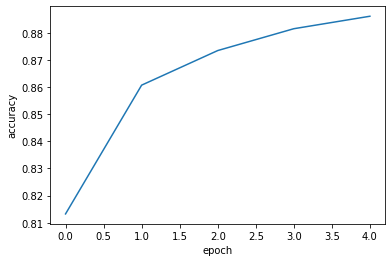

In [7]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

accuracy는 각 에포크마다 향상되는 추세를 볼 수 있다.

이번에는 모델의 epoch를 20번까지 늘려서 손실 그래프를 그려보겠다.

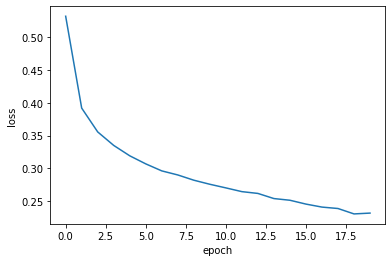

In [8]:
model=model_fn()
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(x_train,y_train,epochs=20,verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [9]:
print(history.history['accuracy'])

[0.8108333349227905, 0.8590624928474426, 0.8712499737739563, 0.8793749809265137, 0.8862083554267883, 0.890625, 0.8948125243186951, 0.8971041440963745, 0.9021458625793457, 0.9035833477973938, 0.9067083597183228, 0.9075000286102295, 0.9107916951179504, 0.9127500057220459, 0.9140416383743286, 0.9168333411216736, 0.9177083373069763, 0.9182083606719971, 0.9209374785423279, 0.9207708239555359]


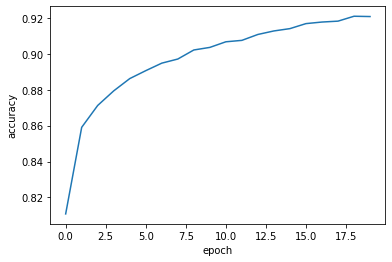

In [10]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

## 검증 손실

위에서 봤던 것처럼 에포크가 증가할 수록 정확도는 향상되고, 손실을 낮아지는 추세를 볼 수 있었다.

chapter04에서 확률적 경사 하강법을 사용했을 때, 과대/과소적합과 에포크와의 관계를 알아봤었다.

인공 신경망도 일종의 경사 하강법을 사용하기 때문에, 동일한 개념이 여기에도 적용된다.

**이는 에포크를 최대한 많이해서 좋은 결과를 나타낼 수 있겠지만, 과대 적합의 위험이 있을 수 있다.**

에포크에 따른 과대적합과 과소적합을 알아내기 위해, **train_set에 대한 점수와 valid_set에 대한 점수를 사용하여 에포크마다 손실을 비교해보겠다.**

**4장에서와 달리 정확도를 사용하지 않고 손실을 그래프에 사용하는 이유는**

**인공 신경망 모델이 최적화하는 대상은 손실 함수이기 때문이다.**

에포크마다 검증 손실을 계산하기 위해 keras 모델의 fit()메소드에서 검증 데이터를 전달 할 수 있다.

**validation_data** 매개변수에 검증에 사용할 데이터를 **튜플**을 사용하여 전달해준다.

In [11]:
model=model_fn()
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(x_train,y_train,epochs=20,verbose=0,validation_data=(x_valid,y_valid))

In [12]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


케라스 모델의 fit()메소드에 validation_data 매개변수를 추가해주니,

History 객체에도 val_loss 와 val_accuracy 키값이 추가되었다.

이 두 키 값에 각 에포크마다 검증 데이터의 손실과 정확도가 저장되어있다.

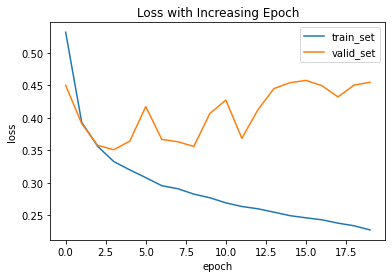

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_set','valid_set'])
plt.title('Loss with Increasing Epoch')
plt.show()

초기에 검증 손실이 감소하다가 다섯 번째 에포크부터 손실이 증가하는 추세가 보인다.

훈련 손실은 꾸준히 감소하기 때문에 과대적합 모델이 만들어질 것이다.

검증 손실이 상승하는 시점을 가능한 뒤로 늦추면 검증 세트에 대한 손실이 줄어들 뿐 아니라, 

검증 세트에 대한 정확도도 증가할 것이다.

당장은 옵티마이저 매개변수를 이용하여 과대적합을 완화시켜보겠다.


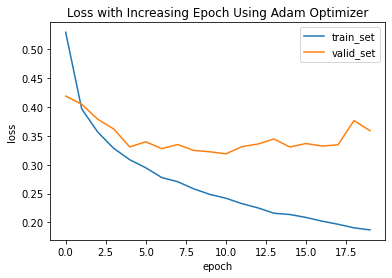

In [14]:
model=model_fn()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(x_train,y_train,epochs=20,verbose=0,validation_data=(x_valid,y_valid))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_set','valid_set'])
plt.title('Loss with Increasing Epoch Using Adam Optimizer')
plt.show()

valid_set에서 손실이 12번째 까지 낮아지는 추세를 가지고 있다.

전 결과보다 과대적합이 조금 완화된 것을 볼 수 있다.

이는 Adam 옵티마이저가 이 data_set에 잘 맞는다는 것을 보여준다.

더 나은 손실 곡선을 위하여 학습률을 조정해서 시도해볼 수 있지만, 

신경망에서 사용하는 대표적인 규제 방법을 사용해보겠다.

## 드롭 아웃

**드롭아웃**은딥러닝의 아버지로 불리는 **제프리힌턴(Geoffrey Hinton)**이 소개했다.

훈련과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 과대적합을 막는 방법

이전 층의 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고,

모든 입력에 대해 주의를 기울여야 한다.

케라스에서는 드롭 아웃을 keras.layers 패키지 아래에 **Dropout** 클래스로 제공한다.

앞서 정의한 model_fn()함수에 드롭아웃 객체를 전달하여 층을 추가해보겠다.

In [15]:
model=model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


은닉층 뒤에 추가된 드롭아웃 층은 훈련되는 모델 파라미터가 없고,

입력과 출력의 크기가 같다. 즉 일부 뉴런의 출력을 0으로 만들지만, 

전체 출력 배열의 크기를 바꾸지는 않는다.

훈련이 끝난 뒤에 평가나 예측을 수행할 때는 드롭아웃을 적용하지 말아야한다.

훈련된 모든 뉴런을 사용해야 올바른 예측을 수행할 수 있기 때문이다.

텐서플로와 케라스는 모델을 평가와 예측에 사용할 때는 드롭아웃을 적용하지 않는다.

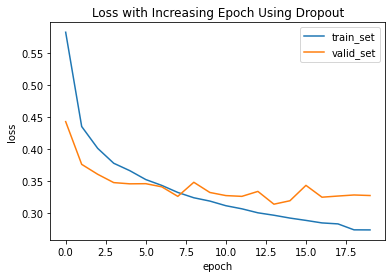

In [16]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(x_train,y_train,epochs=20,verbose=0,validation_data=(x_valid,y_valid))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_set','valid_set'])
plt.title('Loss with Increasing Epoch Using Dropout')
plt.show()

과대적합이 확실히 줄었다.

10~13번째 에포크 정도에서 검증 손실의 감소가 멈추지만 크게 상승하지 않고 어느 정도 유지되고있다.

이 모델은 20번의 에포크 동안 훈련한 모형이기때문에 과대적합이 어느정도 되어있으므로,

에포크 횟수를 10~13 정도로해서 훈련을 다시 해야한다.


## 모델 저장과 복원

케라스 모델은 훈련된 모델의 파라미터를 저장하는 메소드를 제공한다.

**save_weights()** 를 사용하는데, 기본적으로 텐서플로의 체크포인트 포맷으로 저장하지만,
 
파일의 확장자가 '.h5'일 경우 HDF5 포맷으로 저장한다.

이 저장된 모델 파라미터를 불러올 때는 **load_weights()**를 사용한다.

**load_weights() 메소드를 사용하려면 save_weights()에 저장했던 모델과 정확히 같은 구조여야한다.**

또, 모델 구조와 모델 파라미터를 함께 저장하는 **save()**를 제공한다.

이 메소드는 텐서플로의 SavedModel 포맷으로 저장하지만, 

파일의 확장자가 '.h5'일 경우 HDF5 포맷으로 저장한다.



In [17]:
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(x_train,y_train,epochs=13,verbose=0,validation_data=(x_valid,y_valid))

In [18]:
model.save_weights('model-weights.h5')
model.save('model-whole.h5')

In [19]:
!ls -al *.h5

-rw-r--r-- 1 root root 332480 Feb  4 16:04 model-weights.h5
-rw-r--r-- 1 root root 981776 Feb  4 16:04 model-whole.h5


In [20]:
model=model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

이 모델의 검증 정확도를 확인해보자.

케라스에서 예측을 수행하는 **predict()** 메소드는 

사이킷런과 달리 샘플마다 10개의 클래스에 대한 확률을 반환한다.

(이진 분류 문제일시 양성 클래스에 대한 확률 하나만 반환)

패션MNIST data_set에서 덜어낸 검증 세트의 샘플 개수는 12000개이기 때문에

predict() 메소드는 (12000,10) 크기의 배열을 반환한다.

검증 정확도를 사용할 때 evaluate() 메소드를 사용하여 정확도를 출력할 수 있지만,

evaluate() 메소드는 손실을 계산하기 위해 반드시 compile() 메소드를 실행해야 한다.

In [24]:
import numpy as np
pred=model.predict(x_valid)
val_labels=np.argmax(pred,axis=1)
print(np.mean(val_labels==y_valid))

0.8853333333333333


앞서 사용한 save() 메소드를 한 모델을 불러오려면 

keras.models 아래에 있는 **load_model()**을 사용한다.

In [25]:
model=keras.models.load_model('model-whole.h5')
model.evaluate(x_valid,y_valid)

375/375 [==============================] - 1s 1ms/step - loss: 0.3218 - accuracy: 0.8853


[0.3218216300010681, 0.8853333592414856]

방금 했던 과정을 보면 20번의 에포크 동안 모델을 훈련하여 검증 점수가 상승한 지점을 찾고 

다시 에포크를 설정하여 훈련을 했다.

케라스의 **콜백**을 사용하여 한 번에 처리하는 법을 배운다.

## 콜백

**콜백(callback)**은 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체로

keras.callbacks 패키지 아래에 있는 클래스들이다.

**fit() 메소드의 callbacks 매개변수에 리스트로 전달하여 사용한다.**

**ModelCheckpoint** 콜백은 기본적으로 최상의 검증 점수를 만드는 모델을 저장한다.

저장될 파일 이름을 'best-model.h5'로 지정하여 콜백을 적용해 본다.


In [26]:
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-model.h5')
model.fit(x_train,y_train,epochs=20,verbose=0,validation_data=(x_valid,y_valid),callbacks=[checkpoint_cb])

In [29]:
model=keras.models.load_model('best-model.h5')
model.evaluate(x_valid,y_valid)

375/375 [==============================] - 1s 2ms/step - loss: 0.3388 - accuracy: 0.8835


[0.3388219475746155, 0.8834999799728394]

ModelCheckpoint 콜백이 가장 낮은 검증 손실의 모델을 자동으로 저장해 주었다.

하지만 여전히 20번의 에포크 동안 훈련을 한다.

검증 손실이 높아지기 시작하면 그 이후에는 과대적합이 더 키지기 때문에 훈련을 계속할 필요가없다.

과대적합이 시작되기 전에 훈련을 미리 중지하는 것을 **조기종료**라고 부른다.

케라스에는 조기 종료를 위한 **EarlyStopping** 콜백을 제공한다.

이 콜백의 **patience** 매개변수는 검증 점수가 향상되지 않더라도 참을 에포크 횟수로 지정한다.

**restore_best_weights**매개변수를 True로 지정하면 가장 낮은 검증손실을 낸 모델파라미터로 되돌린다.

EarlyStopping 콜백을 ModelCheckpoint 콜백과 함께 사용하면 가장 낮은 검증 손실의 모델을 파일에 저장하고, 검증 손실이 상승할 때 훈련을 중지할 수 있다.

훈련을 중지한 다음 현재 모델의 파라미터를 최상의 파라미터로 되돌린다.



In [33]:
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb=keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history=model.fit(x_train,y_train,epochs=20,verbose=0,validation_data=(x_valid,y_valid),callbacks=[checkpoint_cb,early_stopping_cb])


훈련을 마치고 나면 몇 번째 epoch에서 훈련이 중지되었는지 early_stopping_cb 객체의

**stopped_epoch**속성에서 확인할 수 있다.

In [34]:
print(early_stopping_cb.stopped_epoch)

7


에포크 횟수가 0부터 시작하기 때문에 7은 8번째 epoch에서 훈련이 중지되었다는 것이다.

patience를 2로 지정했으므로, 최상의 모델은 6번째 epoch일 것이다.

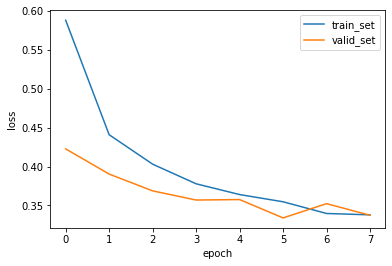

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_set','valid_set'])
plt.show()

위의 그래프를 보면 **6번째(5가 제일 낮지만 0부터 시작)** 에포크에서 검증 손실이 제일 낮다.

마지막으로 조기 종료로 얻은 모델을 사용해 valid_set에 대한 성능을 확인해보겠다.

In [36]:
model.evaluate(x_valid,y_valid)

375/375 [==============================] - 1s 1ms/step - loss: 0.3340 - accuracy: 0.8807


[0.33398130536079407, 0.8806666731834412]